# Step 1: Installation and Setup

In [0]:
# Installing TensorFlow
!pip install -q tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle to Colab

In [0]:
# Installing Kaggle API
! pip install -q kaggle

In [0]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [6]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [0]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [9]:
# list of datasets
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-17 22:02:37          53575  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           4196  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40            703  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45             55  
andrewmvd/covid19-ct-scans                    

In [10]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:02<00:00, 118MB/s]
100% 218M/218M [00:02<00:00, 96.4MB/s]


In [0]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [0]:
# Creating an object (Initilizing CNN)
model = tf.keras.models.Sequential()

In [0]:
# Adding first CCN layer
# 1) filters (kernel/feature detectors) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [0]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [0]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [0]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [0]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [0]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
# Adding output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [0]:
# rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [25]:
len(training_set), len(test_set)

(401, 102)

In [26]:
len(training_set) *20, len(test_set)*20

(8020, 2040)

In [27]:
test_set.batch_size

20

In [0]:
epochs=20

In [29]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=epochs, validation_data=test_set, validation_steps=102)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 401 steps, validate for 102 steps
Epoch 1/20
401/401 [==============================] - 50s 124ms/step - loss: 0.6540 - accuracy: 0.6144 - val_loss: 0.6142 - val_accuracy: 0.6629
Epoch 2/20
401/401 [==============================] - 49s 123ms/step - loss: 0.5859 - accuracy: 0.6883 - val_loss: 0.5693 - val_accuracy: 0.7123
Epoch 3/20
401/401 [==============================] - 49s 122ms/step - loss: 0.5421 - accuracy: 0.7240 - val_loss: 0.5480 - val_accuracy: 0.7291
Epoch 4/20
401/401 [==============================] - 49s 123ms/step - loss: 0.5125 - accuracy: 0.7442 - val_loss: 0.5133 - val_accuracy: 0.7538
Epoch 5/20
401/401 [==============================] - 49s 123ms/step - loss: 0.4892 - accuracy: 0.7644 - val_loss: 0.5294 - val_accuracy: 0.7370
Epoch 6/20
401/401 [==============================] - 49s 123ms/step - loss: 0.4494 - accuracy: 0.7858 - 

# Step 5: Plotting the learning curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


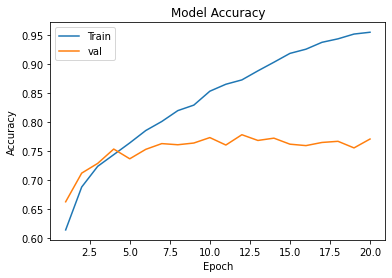

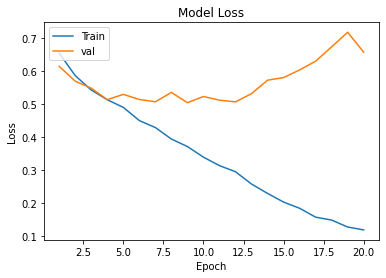

In [31]:
learning_curve(history, epochs)